In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

files.upload()
df = pd.read_csv('df.csv', encoding='utf8')

Saving df.csv to df.csv


In [2]:
df.head()
len(df)

720

In [3]:
df = df.drop_duplicates(['name'], keep='first', inplace=False)
df = df.replace(0, np.NaN, inplace=False)
df = df.dropna(axis=0, inplace=False)
df.reset_index(inplace=False)
len(df)

349

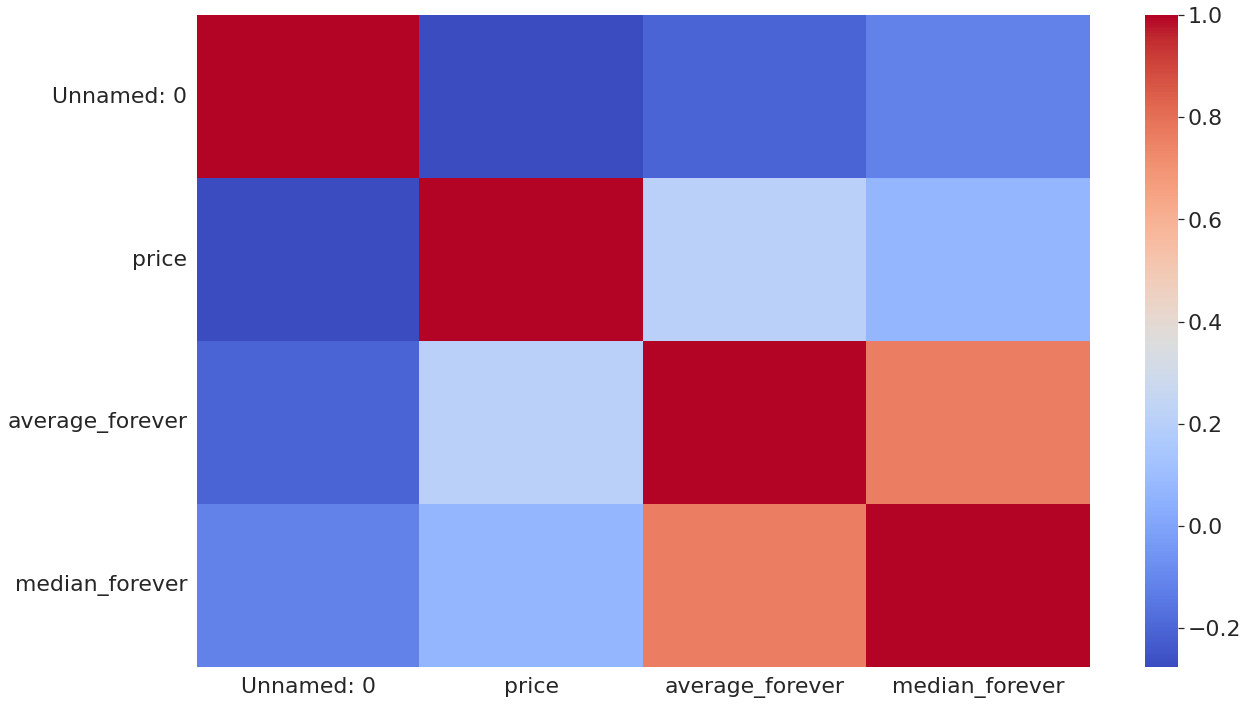

In [4]:
sns.set(font_scale = 2, rc = {'figure.figsize':(20,12)})
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

In [5]:
df.corr()

,Unnamed: 0,price,average_forever,median_forever
Unnamed: 0,1.000000,-0.276530,-0.202796,-0.112261
price,-0.276530,1.000000,0.207550,0.070551
average_forever,-0.202796,0.207550,1.000000,0.765015
median_forever,-0.112261,0.070551,0.765015,1.000000


In [6]:
df.sort_values(by='price', ascending=False).groupby('name').head(30)

,Unnamed: 0,name,price,average_forever,median_forever
86,87,Just Cause 4 Reloaded,69.03,18.7,9.8
22,23,Sekiro: Shadows Die Twice - GOTY Edition,59.99,46.8,27.6
18,19,Gotham Knights,59.99,18.0,22.6
346,347,Life is Strange: True Colors,59.99,13.1,14.7
37,38,Assassin's Creed Odyssey,59.99,88.6,62.5
...,...,...,...,...,...
620,621,The Deed,0.99,3.1,3.2
139,140,Shower With Your Dad Simulator 2015: Do You St...,0.99,9.6,1.1
451,452,RUSSIAPHOBIA,0.49,1.1,1.5
439,440,Red Lake,0.30,3.7,3.9


In [7]:
df.sort_values(by='average_forever', ascending=False).groupby('name').head(30)

,Unnamed: 0,name,price,average_forever,median_forever
91,92,Marco & The Galaxy Dragon,9.99,595.2,892.4
133,134,CLANNAD,44.99,487.7,6.5
29,30,Pathfinder: Wrath of the Righteous - Enhanced ...,49.99,110.7,77.4
42,43,Fallout 4,19.99,108.5,35.3
37,38,Assassin's Creed Odyssey,59.99,88.6,62.5
...,...,...,...,...,...
345,346,Milk inside a bag of milk inside a bag of milk,0.99,0.4,0.4
263,264,Red Matter,24.99,0.4,0.5
430,431,Happy Puzzle,1.99,0.4,0.4
354,355,Starlight Vega,9.99,0.2,0.2


In [8]:
df['mania'] = df['average_forever'] - df['median_forever']
a = df.sort_values(by='mania', ascending=False).groupby('name').head()
df.sort_values(by='mania', ascending=False).groupby('name').head()

,Unnamed: 0,name,price,average_forever,median_forever,mania
133,134,CLANNAD,44.99,487.7,6.5,481.2
42,43,Fallout 4,19.99,108.5,35.3,73.2
114,115,Ori and the Will of the Wisps,29.99,78.8,13.4,65.4
78,79,The Elder Scrolls V: Skyrim Special Edition,39.99,73.5,21.4,52.1
4,5,Red Dead Redemption 2,59.99,79.2,34.3,44.9
...,...,...,...,...,...,...
19,20,Symphony of War: The Nephilim Saga,13.99,23.9,36.0,-12.1
462,463,THE LONGING,14.99,23.2,35.6,-12.4
155,156,Umineko When They Cry - Answer Arcs,29.99,50.7,65.2,-14.5
57,58,Umineko When They Cry - Question Arcs,24.99,32.6,47.4,-14.8


In [9]:
a.head(10)

,Unnamed: 0,name,price,average_forever,median_forever,mania
133,134,CLANNAD,44.99,487.7,6.5,481.2
42,43,Fallout 4,19.99,108.5,35.3,73.2
114,115,Ori and the Will of the Wisps,29.99,78.8,13.4,65.4
78,79,The Elder Scrolls V: Skyrim Special Edition,39.99,73.5,21.4,52.1
4,5,Red Dead Redemption 2,59.99,79.2,34.3,44.9
0,1,The Witcher 3: Wild Hunt,39.99,57.2,13.0,44.2
27,28,DARK SOULS III,59.99,66.7,25.4,41.3
261,262,NEKOPARA Vol. 1,9.99,43.5,2.4,41.1
122,123,Pathfinder: Kingmaker - Enhanced Plus Edition,19.99,51.6,17.2,34.4
29,30,Pathfinder: Wrath of the Righteous - Enhanced ...,49.99,110.7,77.4,33.3


In [10]:
feature = ['average_forever']
target = ['price']
X = df[feature]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
X_test = [[2]]
y_pred = model.predict(X_test)
print(f'플레이타임 :      {X_test[0][0]} 시간 ->  {int(y_pred)} 달러')

X_test = [[5]]
y_pred = model.predict(X_test)
print(f'플레이타임 :      {X_test[0][0]} 시간 ->  {int(y_pred)} 달러')

X_test = [[20]]
y_pred = model.predict(X_test)
print(f'플레이타임 :     {X_test[0][0]} 시간 ->  {int(y_pred)} 달러')

X_test = [[100]]
y_pred = model.predict(X_test)
print(f'플레이타임 :    {X_test[0][0]} 시간 ->  {int(y_pred)} 달러')

X_test = [[250]]
y_pred = model.predict(X_test)
print(f'플레이타임 :    {X_test[0][0]} 시간 ->  {int(y_pred)} 달러')

X_test = [[1000]]
y_pred = model.predict(X_test)
print(f'플레이타임 :   {X_test[0][0]} 시간 ->  {int(y_pred)} 달러')

X_test = [[10000]]
y_pred = model.predict(X_test)
print(f'플레이타임 :  {X_test[0][0]} 시간 -> {int(y_pred)} 달러')

플레이타임 :      2 시간 ->  14 달러
플레이타임 :      5 시간 ->  16 달러
플레이타임 :     20 시간 ->  22 달러
플레이타임 :    100 시간 ->  54 달러
플레이타임 :    250 시간 ->  114 달러
플레이타임 :   1000 시간 ->  414 달러
플레이타임 :  10000 시간 -> 4022 달러


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

In [12]:
df_tree = df[['price', 'average_forever']]
df_tree = df_tree.astype('int')
df_tree = df_tree.round(2)

X_train, X_test, y_train, y_test = train_test_split(df_tree.drop('price', axis=1), df_tree['price'], test_size = 0.2, random_state=100)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.12857142857142856

In [13]:
X_test.head(30)

,average_forever
282,6
270,3
8,3
67,8
190,10
279,31
197,10
76,48
82,48
175,14


In [14]:
pred

array([ 9,  9,  9,  7,  9, 19,  9, 59, 59, 19, 49, 29, 19,  9, 59, 19, 19,
       11, 19,  9, 19, 14, 19, 19, 14, 24,  9, 19,  9,  7, 19, 19, 14,  7,
       24,  9, 29, 49,  9,  9, 19,  7, 14,  9,  9,  7,  9, 19,  9, 14, 49,
        9, 29, 16, 19, 19, 39,  9, 19,  9,  9,  9,  9, 14, 19,  4, 29, 19,
       19, 19])

In [25]:
tree_test = pd.DataFrame({'average_forever':[10]})
print(model.predict(tree_test))

tree_test1 = pd.DataFrame({'average_forever':[2]})
print(f'플레이타임 :      2 시간 ->   {model.predict(tree_test1)[0]} 달러')

tree_test2 = pd.DataFrame({'average_forever':[5]})
print(f'플레이타임 :      5 시간 ->   {model.predict(tree_test2)[0]} 달러')

tree_test3 = pd.DataFrame({'average_forever':[20]})
print(f'플레이타임 :     20 시간 ->  {model.predict(tree_test3)[0]} 달러')

tree_test4 = pd.DataFrame({'average_forever':[100]})
print(f'플레이타임 :    100 시간 ->  {model.predict(tree_test4)[0]} 달러')

tree_test5 = pd.DataFrame({'average_forever':[250]})
print(f'플레이타임 :    250 시간 ->  {model.predict(tree_test5)[0]} 달러')

tree_test6 = pd.DataFrame({'average_forever':[1000]})
print(f'플레이타임 :   1000 시간 ->  {model.predict(tree_test6)[0]} 달러')

tree_test7 = pd.DataFrame({'average_forever':[10000]})
print(f'플레이타임 :  10000 시간 ->  {model.predict(tree_test7)[0]} 달러')

[9]
플레이타임 :      2 시간 ->   9 달러
플레이타임 :      5 시간 ->   4 달러
플레이타임 :     20 시간 ->  14 달러
플레이타임 :    100 시간 ->  19 달러
플레이타임 :    250 시간 ->  49 달러
플레이타임 :   1000 시간 ->  49 달러
플레이타임 :  10000 시간 ->  49 달러
